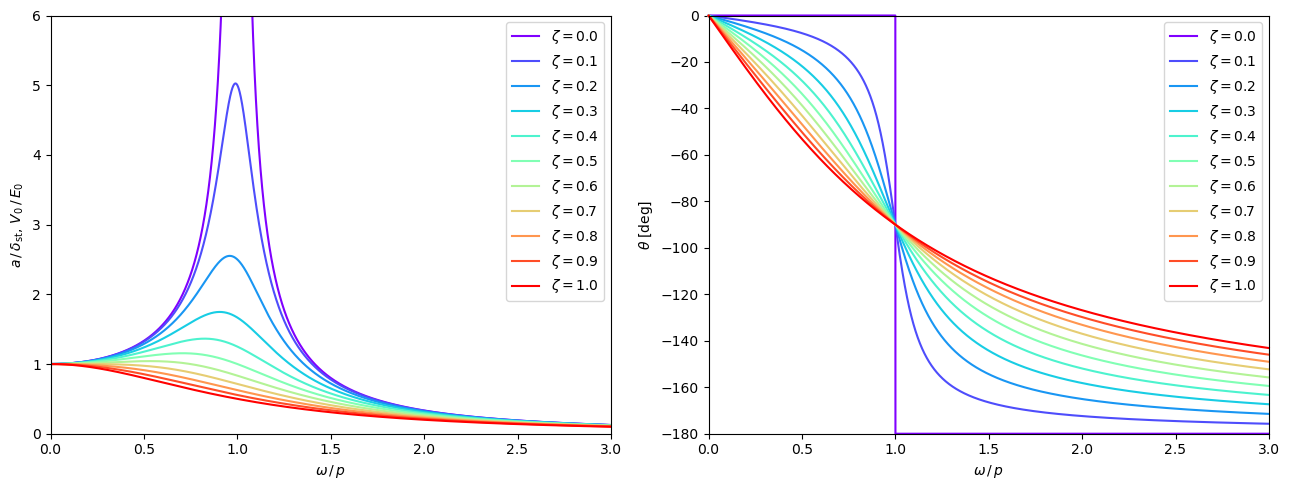

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 現在のファイル名を取得するためのパス設定
current_path = Path.cwd()
notebook_name = '2次遅れ系_周波数応答'
output_pdf = current_path / f"{notebook_name}.pdf"

# 定数の定義
zeta_values = np.linspace(0, 1.0, 11)

# ω/pの値の範囲と分割数を定義
omega_over_p = np.linspace(0.001, 3, 100000)  # 0を避けるために0.001から開始

# 虹色の範囲を定義 (赤から紫へ)
colors = plt.cm.rainbow(np.linspace(0, 1, len(zeta_values)))

# Microsoft Wordの標準的な横幅に合わせたグラフのサイズを設定
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))  # 横幅を13インチ、高さを5インチに設定

# 振幅特性のプロット
for zeta, color in zip(zeta_values, colors):
    # 0除算を避けるための対策
    denominator = np.sqrt((1 - omega_over_p**2)**2 + (2 * zeta * omega_over_p)**2)
    # ゼータが0の場合の特別処理
    if zeta == 0:
        # omega_over_p = 1の場合に無限大になるので、その付近を処理
        mask = np.abs(omega_over_p - 1.0) < 1e-3
        y = np.ones_like(omega_over_p) / denominator
        y[mask] = 6.0  # グラフの上限値に設定
    else:
        y = 1.0 / denominator
    ax1.plot(omega_over_p, y, label=rf'$\zeta = {zeta:.1f}$', color=color)

# 振幅特性グラフの設定
ax1.set_xlabel(r'$\omega\,/\,p$')
ax1.set_ylabel(r'$a\,/\,\delta_{\mathrm{st}},\,V_0\,/\,E_0$')
ax1.set_xlim([0, 3])
ax1.set_ylim([0, 6])
ax1.grid(False)
ax1.legend(fontsize=10)

# 位相特性のプロット
for zeta, color in zip(zeta_values, colors):
    y = np.arctan2(-2 * zeta * omega_over_p, 1 - omega_over_p**2) * 180 / np.pi
    ax2.plot(omega_over_p, y, label=rf'$\zeta = {zeta:.1f}$', color=color, clip_on=False)

# 位相特性グラフの設定
ax2.set_xlabel(r'$\omega\,/\,p$')
ax2.set_ylabel(r'$\theta\;[\mathrm{deg}]$')
ax2.set_xlim([0, 3])
ax2.set_ylim([-180, 0])
ax2.grid(False)
ax2.legend(fontsize=10)

# グラフの表示と保存
plt.tight_layout()
plt.savefig(output_pdf, bbox_inches='tight')
plt.show()